In [57]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from networkx.algorithms import bipartite
import pandas as pd
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [58]:
DATA = '../Data/out.moreno_crime_crime'
ROLE = '../Data/rel.moreno_crime_crime.person.role'
NAME = '../Data/ent.moreno_crime_crime.person.name'
SEX =  '../Data/ent.moreno_crime_crime.person.sex'

In [59]:
with open(DATA) as f:
    data = f.read().splitlines()
    
with open(ROLE) as f:
    role = f.read().splitlines()
    
with open(NAME) as f:
    name = f.read().splitlines()
    
with open(SEX) as f:
    sex = f.read().splitlines()

for i in range(len(data)):
    data[i] = 'p' + data[i]

In [60]:
E = nx.read_edgelist(data)
print(len(E.nodes()), len(E.edges()))

1380 1476


In [61]:
graph = np.loadtxt(DATA, dtype = str)
a = np.unique(graph[:,0])
b = np.unique(graph[:,1])
a = ['p' + a for a in a]
len(a), len(b)

(829, 551)

In [62]:
G = nx.Graph()
for j in range(len(a)):
    G.add_node(a[j], bipartite=0, data=True, name=name[j], sex=sex[j])
#print(len(G.nodes()))
G.add_nodes_from(b, bipartite=1, data=True)
#print(len(G.nodes())-829)

#len(G.nodes()), len(G.edges)
i = 0
for edge in E.edges():
    G.add_edge(edge[0], edge[1], role= [role[i]])
    i+=1

len(G.nodes()), len(G.edges)

(1380, 1476)

In [63]:
i = 0
for edge in E.edges():
    G.add_edge(edge[0], edge[1], weight= [role[i]])
    i+=1

len(G.nodes()), len(G.edges)

(1380, 1476)

In [64]:
print(
    'Num. of nodes: {} \nNum. of edges: {} \nIs bipartite? {} \nIs connected? {}'.format(
        G.number_of_nodes(), 
        G.number_of_edges(), 
        nx.is_bipartite(G),
        nx.is_connected(G)
        )
    )

Num. of nodes: 1380 
Num. of edges: 1476 
Is bipartite? True 
Is connected? False


In [70]:
top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

20

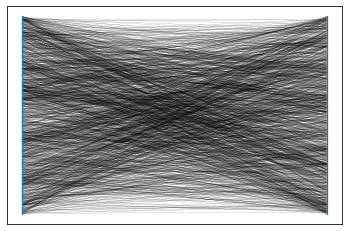

In [67]:
nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, a), width = 0.1, linewidths = 0.5, node_size = 0.5, scale = 0.5, with_labels = False)




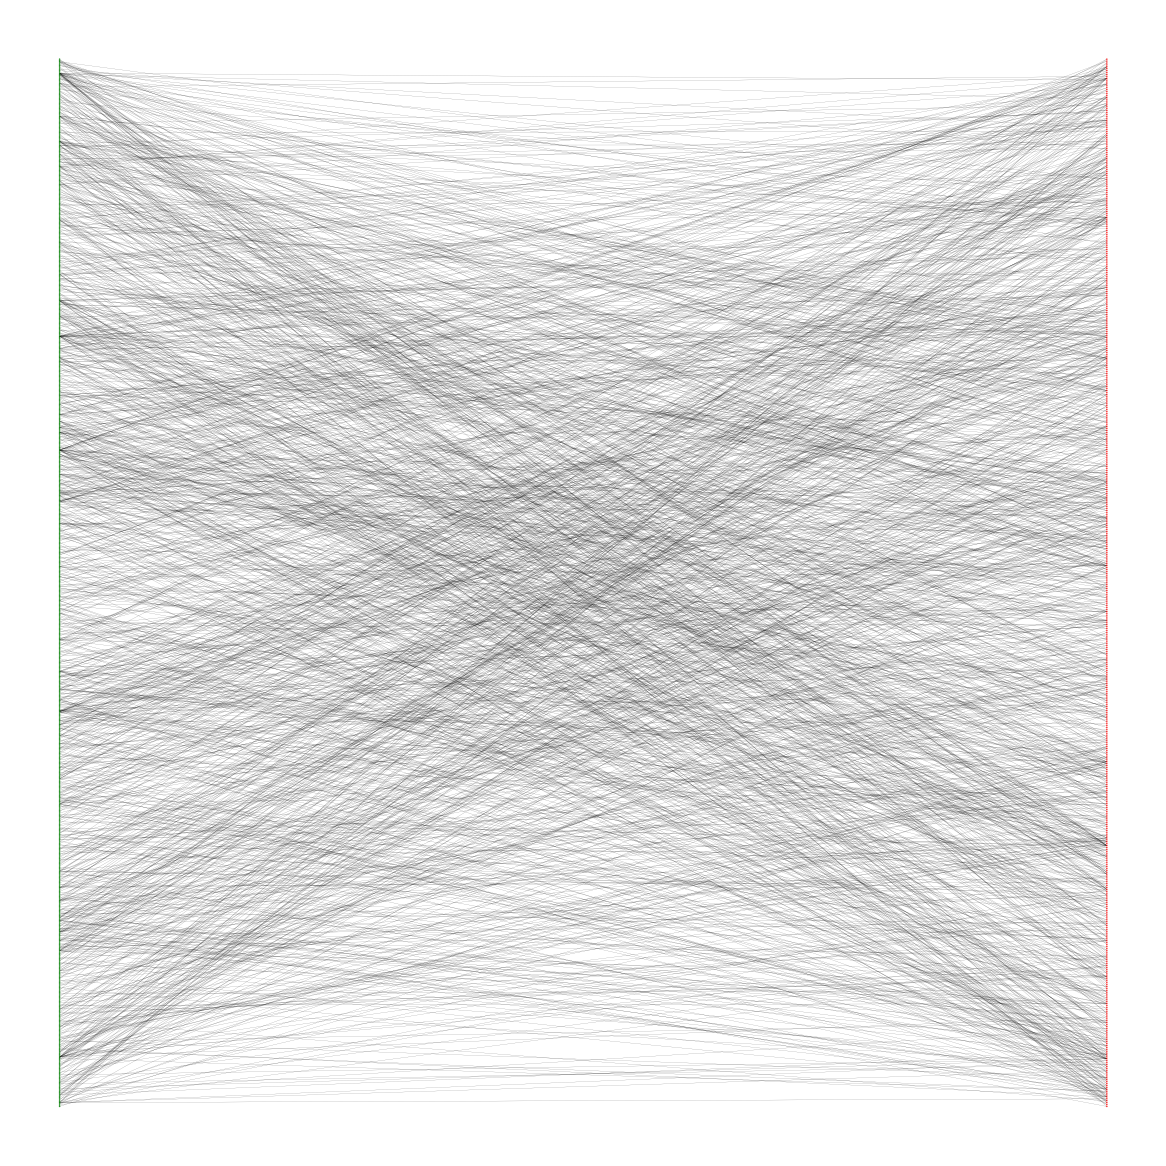

In [69]:
pos = nx.bipartite_layout(G, a)
plt.figure(3,figsize=(16,16))
color_map = []
edge_cm = []
for node in G:
    if node.startswith('p'):
        color_map.append('green')
    else:
        color_map.append('red')

#for edge in G:
#    if edge[role] == 'Suspect':
#        edge_cm.append('red')
        
nx.draw(G, pos, node_color=color_map, with_labels = False, node_size = 0.2, width = 0.1)
plt.show()

In [12]:
#How many different components in the network?
nx.number_connected_components(G)

20

In [71]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
Gcc[0]
len(G0)

1263

In [26]:
comp_list = []
for comp in Gcc:
    comp_len = len(comp)
    comp_list.append(comp_len)

f'Number of nodes for each components {comp_list} and number of components {len(comp_list)}'

'Number of nodes for each components [1263, 30, 18, 13, 9, 7, 6, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2] and number of components 20'

In [78]:
top_nodes0 = {n for n, d in G0.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes0 = set(G0) - top_nodes0

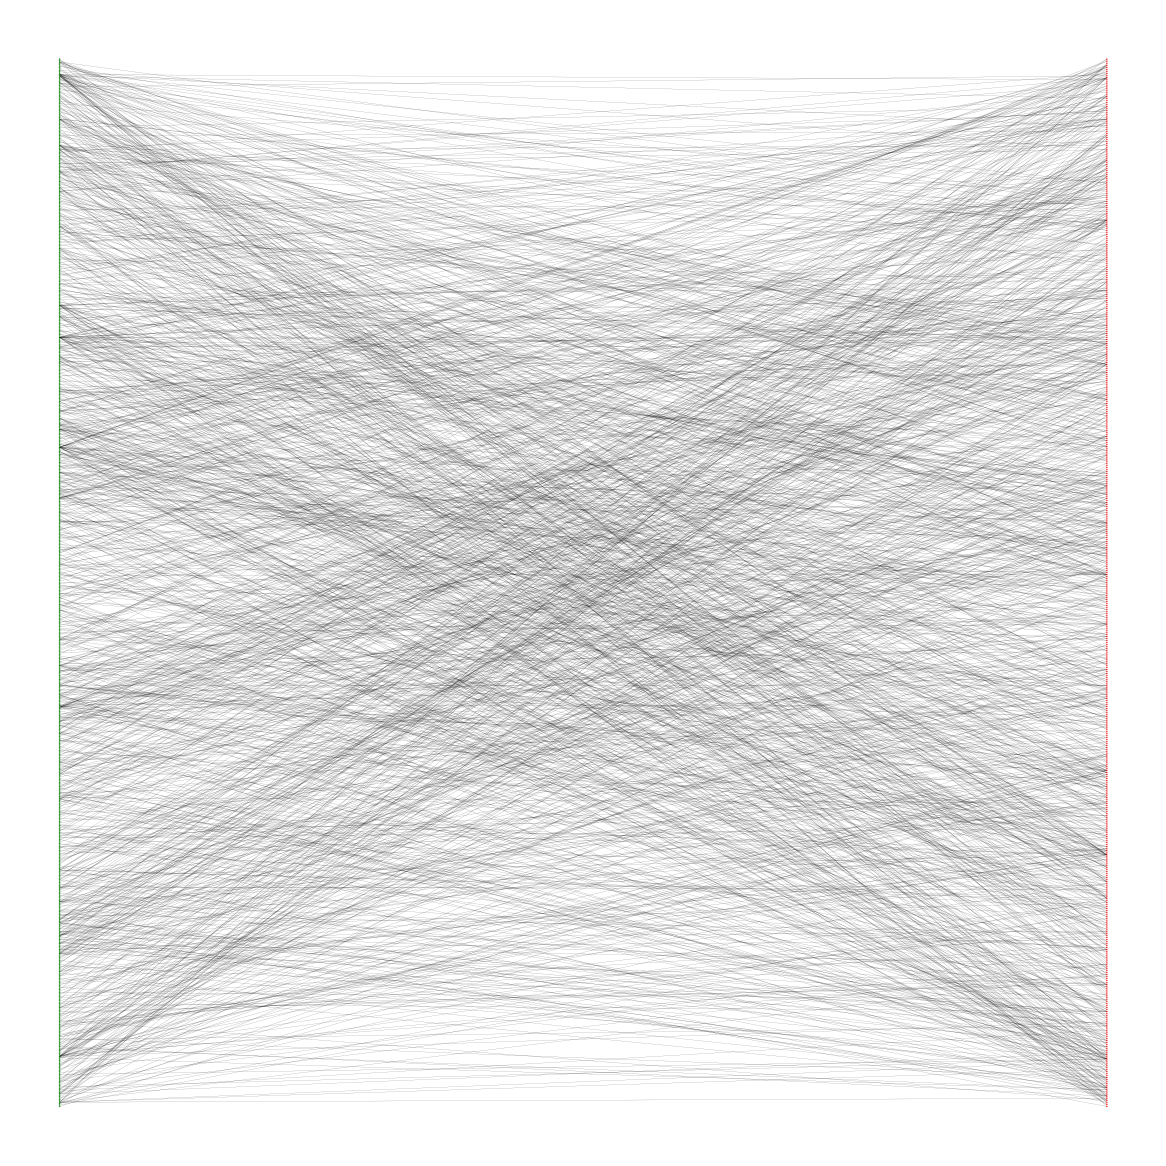

754

In [80]:
pos = nx.bipartite_layout(G0, top_nodes0)
plt.figure(3,figsize=(16,16))
color_map = []
edge_cm = []
for node in G0:
    if node.startswith('p'):
        color_map.append('green')
    else:
        color_map.append('red')


        
nx.draw(G0, pos, node_color=color_map, with_labels = False, node_size = 0.2, width = 0.1)
plt.show()
len(top_nodes0)